08-13-20
Cal Craven
Plot important features for Discussion
1. Read in data from csv
2. Plot phases vs statepoints
3. Plot heatmaps with statepoints
4. Plots correlations of single particle descriptors
5. Plot phase prediction histograms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from plotting import *
from matplotlib import colors

# Section 1: Read in data from csv files

In [2]:
df_full=pandas.read_csv('Full_TNP_Dataset.csv')
df_single_np = pandas.read_csv('Single_Tether_Data.csv')
df_rg_asphere = pandas.read_csv('rg_asphere.csv')
df_single_np = pandas.concat([df_single_np, df_rg_asphere],axis=1, sort=False)

In [3]:
df_full

,Unnamed: 0,ID,Chain_length,Chain_density,fsa,Coordination_number,Standard_deviation,Phase,sasa,Chain Radius of Gyration,NP Radius of Gyration,Asphericity
0,0,1499538af491ce89bbfed0de287077ee/,18.0,4.0,0.65,1.996040,1.012073,2.0,0.665687,2.461474,0.293872,0.098198
1,1,14a2b8b463e21ae1954f5a1c617847e2/,30.0,3.0,0.55,0.683564,0.515616,0.0,0.319892,1.483445,0.231440,0.054226
2,2,1bb21ced4538fec0a1744ab973600ca0/,18.0,2.5,0.55,2.501386,1.321066,2.0,0.637046,2.127633,0.316644,0.074754
3,3,1bd06d14f87674a7d263b6ea42872fb9/,18.0,4.0,0.45,1.386139,0.652775,1.0,0.384106,2.688367,0.256063,0.061832
4,4,270c0867ad60b13942fa6ae00f91bf96/,24.0,3.5,0.45,0.670099,0.686022,0.0,0.289253,1.701846,0.232897,0.048291
5,5,2786e7ea28a7e59e2e50ff5e580c7d3e/,21.0,4.5,0.55,1.390099,0.676556,1.0,0.372064,2.180569,0.244966,0.067659
6,6,2c8bf79a2c578f2bec76c078865b4132/,18.0,3.5,0.25,0.002376,0.008058,0.0,0.170544,2.414382,0.244525,0.022002
7,7,33c0d152f8ff745cc703b13fe4967842/,18.0,3.5,0.55,1.990495,0.773594,1.0,0.553903,2.282502,0.280405,0.082432
8,8,3688f57faae97574bce28b1c7ff935bd/,18.0,3.0,0.35,1.406733,0.579579,1.0,0.335927,2.087083,0.263745,0.042142
9,9,3719d43c55829a655347311220b2d273/,33.0,3.5,0.65,0.727129,0.658612,0.0,0.361231,1.244242,0.226512,0.050709


# Section 2: Plot Phases vs Statepoints

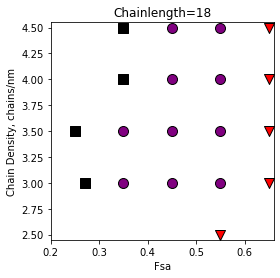

In [3]:
Plot_Fixed_Cl(df_full,18)

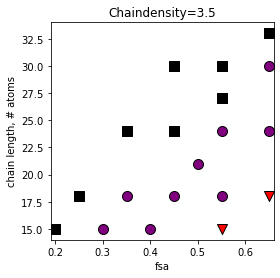

In [4]:
Plot_Fixed_Cd(df_full,3.5)

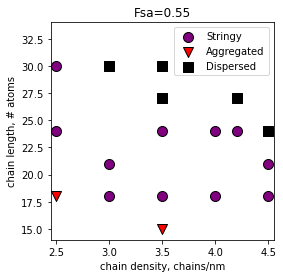

In [6]:
Plot_Fixed_Fsa(df_full,0.55)

# Section 3: Plot Heat maps for with SASA

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from plotting import *
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import ListedColormap

grays = cm.get_cmap('gist_gray', 256)
white = np.array(grays(256))
gray = np.array(grays(150))
reds = cm.get_cmap('Reds', 256)
purples = cm.get_cmap('magma', 256)
purple = np.array(purples(100))
red = np.array(purples(165))
newcmp = ListedColormap([gray,red,purple,white])

[0.175 0.325 0.46  0.585 0.75 ]
Region 1:  20.0
Region 2a:  10.0
Region 2b:  10.0
Region 3:  15.0
Region 4a:  8.0
Region 4b:  8.0
Region 5:  26.0


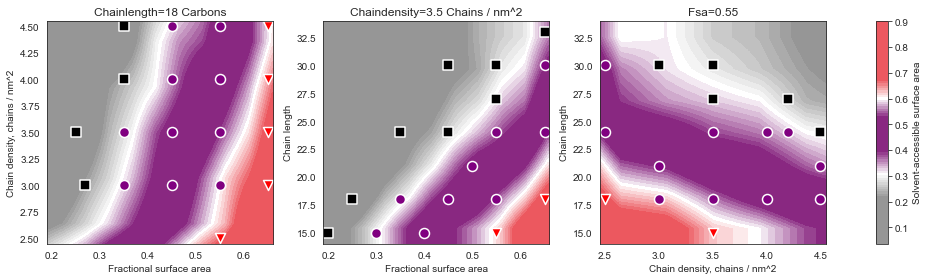

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from plotting import *
import seaborn as sns

df_full=pandas.read_csv('Full_TNP_Dataset.csv')
df_single_np = pandas.read_csv('Single_Tether_Data.csv')
df_rg_asphere = pandas.read_csv('rg_asphere.csv')

bounds=np.array([0.1, 0.25, 0.4, 0.52, 0.65, 0.85])
newcmp = ListedColormap(Get_Clrmap([gray,white,purple,white,red],100,bounds))

sns.set_style('white')
chainlength = df_single_np['chainlength'].unique()
chainlength.sort()
chain_density = df_single_np['chain_density'].unique()
chain_density.sort()
fsa = df_single_np['fsa'].unique()
fsa.sort()
Plot_Heatmaps(chainlength,chain_density,fsa,df_single_np,df_full,newcmp,'bilinear')

Use this plot to plot the other interesting single particle attributes. You can do 'Graft_rg', 'NP_rg', and 'Asphericity'

[0.175  0.21   0.23   0.26   0.3175]
Region 1:  16.0
Region 2a:  10.0
Region 2b:  10.0
Region 3:  0.0
Region 4a:  16.0
Region 4b:  16.0
Region 5:  29.0


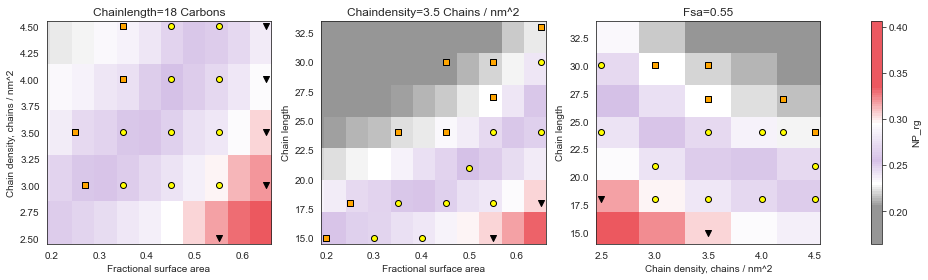

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from plotting import *
import seaborn as sns

df_full=pandas.read_csv('Full_TNP_Dataset.csv')
df_single_np = pandas.read_csv('Single_Tether_Data.csv')
df_rg_asphere = pandas.read_csv('rg_asphere.csv')
df_single_np = pandas.concat([df_single_np, df_rg_asphere],axis=1, sort=False)

bounds=np.array([0.16, 0.19, 0.23, 0.23, 0.29, 0.345]) #NP_rg  np.array([0.3,0.6,0.4,0])
#bounds=np.array([0.005,0.02,0.07,0.08,0.097,0.115]) #Asphericity
#newcmp = cm.magma #Graft_rg 
newcmp = ListedColormap(Get_Clrmap([gray,white,purple+np.array([0.3,0.6,0.4,0]),white,red],100,bounds))

sns.set_style('white')
chainlength = df_single_np['chainlength'].unique()
chainlength.sort()
chain_density = df_single_np['chain_density'].unique()
chain_density.sort()
fsa = df_single_np['fsa'].unique()
fsa.sort()
Plot_Heatmaps_all(chainlength,chain_density,fsa,df_single_np,df_full,'NP_rg',newcmp,None)

# Section 4: Plot Correlations between Single Particle Descriptors and Other Variables

In [7]:
df = pandas.DataFrame()
parameters = df_full.columns[2:]

df =  df_full.loc[df_full['sasa']>0]
df.loc[:, ('sasa')]= df['sasa'].values

reorder_cols = ['Phase','Coordination_number','Standard_deviation',
                 'Chain_length','Chain_density','fsa','sasa',
                'Chain Radius of Gyration','NP Radius of Gyration',
                'Asphericity']
cols = ([col for col in reorder_cols if col in df])
df = df[cols]


/Users/calcraven/miniconda3/envs/simulation36/lib/python3.6/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [8]:
df

,Phase,Coordination_number,Standard_deviation,Chain_length,Chain_density,fsa,sasa,Chain Radius of Gyration,NP Radius of Gyration,Asphericity
0,2.0,1.996040,1.012073,18.0,4.0,0.65,0.665687,2.461474,0.293872,0.098198
1,0.0,0.683564,0.515616,30.0,3.0,0.55,0.319892,1.483445,0.231440,0.054226
2,2.0,2.501386,1.321066,18.0,2.5,0.55,0.637046,2.127633,0.316644,0.074754
3,1.0,1.386139,0.652775,18.0,4.0,0.45,0.384106,2.688367,0.256063,0.061832
4,0.0,0.670099,0.686022,24.0,3.5,0.45,0.289253,1.701846,0.232897,0.048291
5,1.0,1.390099,0.676556,21.0,4.5,0.55,0.372064,2.180569,0.244966,0.067659
6,0.0,0.002376,0.008058,18.0,3.5,0.25,0.170544,2.414382,0.244525,0.022002
7,1.0,1.990495,0.773594,18.0,3.5,0.55,0.553903,2.282502,0.280405,0.082432
8,1.0,1.406733,0.579579,18.0,3.0,0.35,0.335927,2.087083,0.263745,0.042142
9,0.0,0.727129,0.658612,33.0,3.5,0.65,0.361231,1.244242,0.226512,0.050709


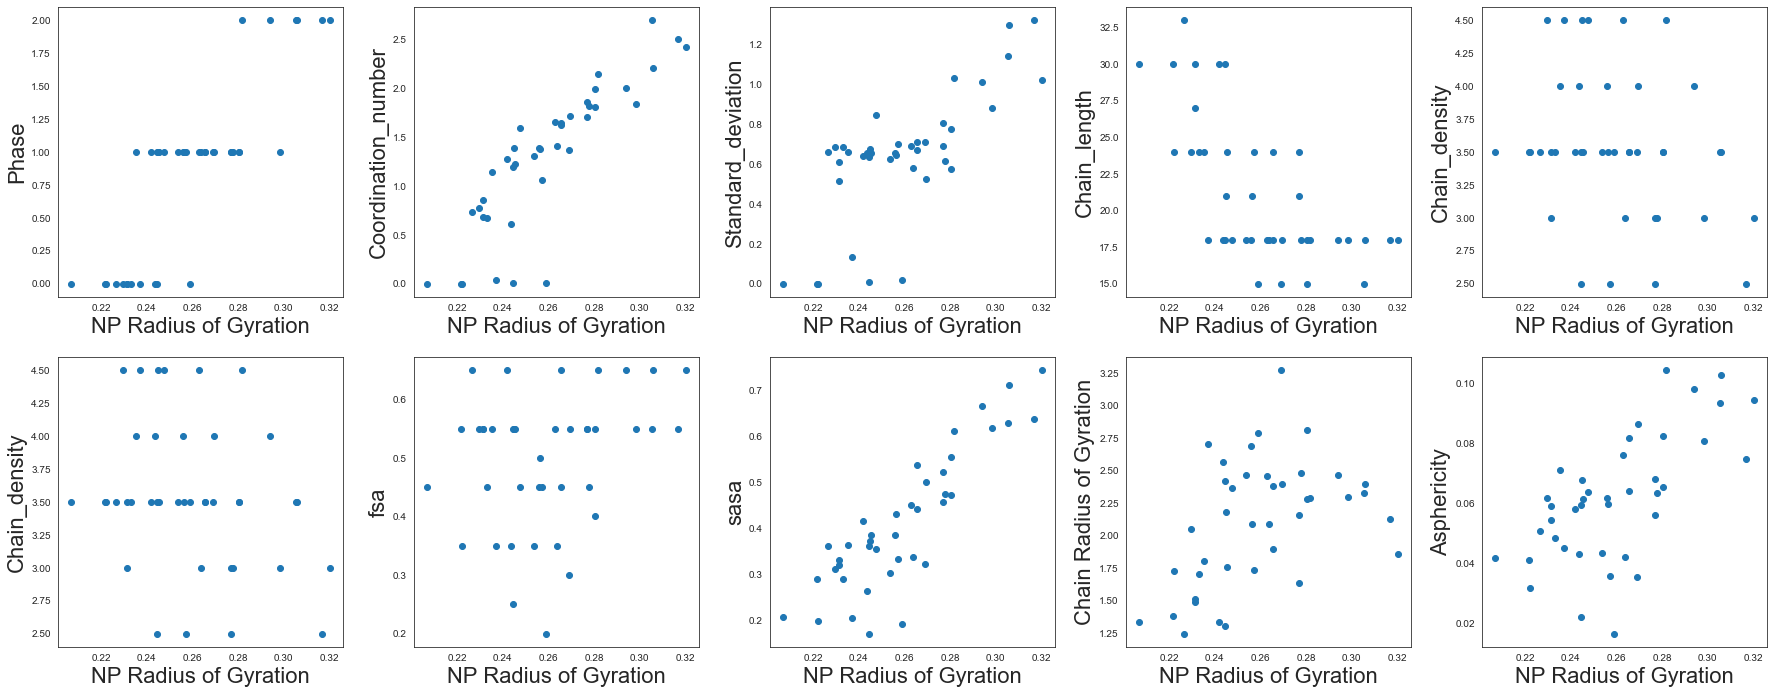

In [13]:
parameter = 'NP Radius of Gyration'
length = len(df.axes[1])
figs,axs = plt.subplots(2,5,figsize=(25,10))
for j in [0,1]:
    for i in [0,1,2,3,4]:
        yattribute = df.drop(parameter, axis=1).axes[1][i+j*4]
        axs[j][i].scatter(df[(df[parameter]>0)][parameter].values,
                        df[(df[parameter]>0)][yattribute].values)
        axs[j][i].set_ylabel(yattribute,fontsize=22)
        axs[j][i].set_xlabel(parameter,fontsize=22)
plt.tight_layout(pad=2)
plt.savefig('Figures/correlatations-NP_rg.pdf',dpi=200)
plt.show()

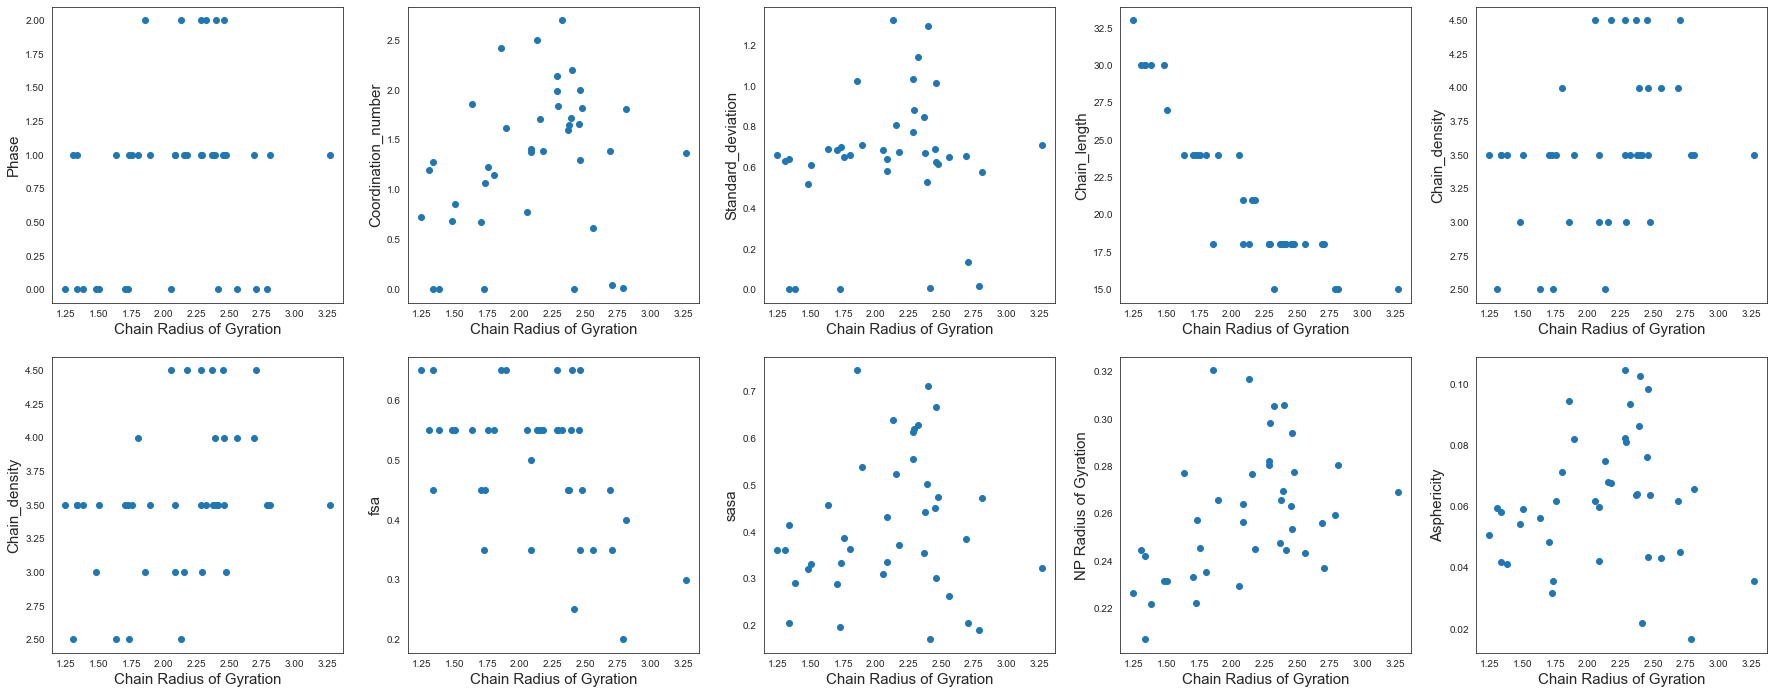

In [14]:
parameter = 'Chain Radius of Gyration'
length = len(df.axes[1])
figs,axs = plt.subplots(2,5,figsize=(25,10))
for j in [0,1]:
    for i in [0,1,2,3,4]:
        yattribute = df.drop(parameter, axis=1).axes[1][i+j*4]
        axs[j][i].scatter(df[(df[parameter]>0)][parameter].values,
                        df[(df[parameter]>0)][yattribute].values)
        axs[j][i].set_ylabel(yattribute,fontsize=15)
        axs[j][i].set_xlabel(parameter,fontsize=15)
plt.tight_layout(pad=2)
plt.savefig('Figures/correlatations-Graft_rg.pdf',dpi=200)
plt.show()

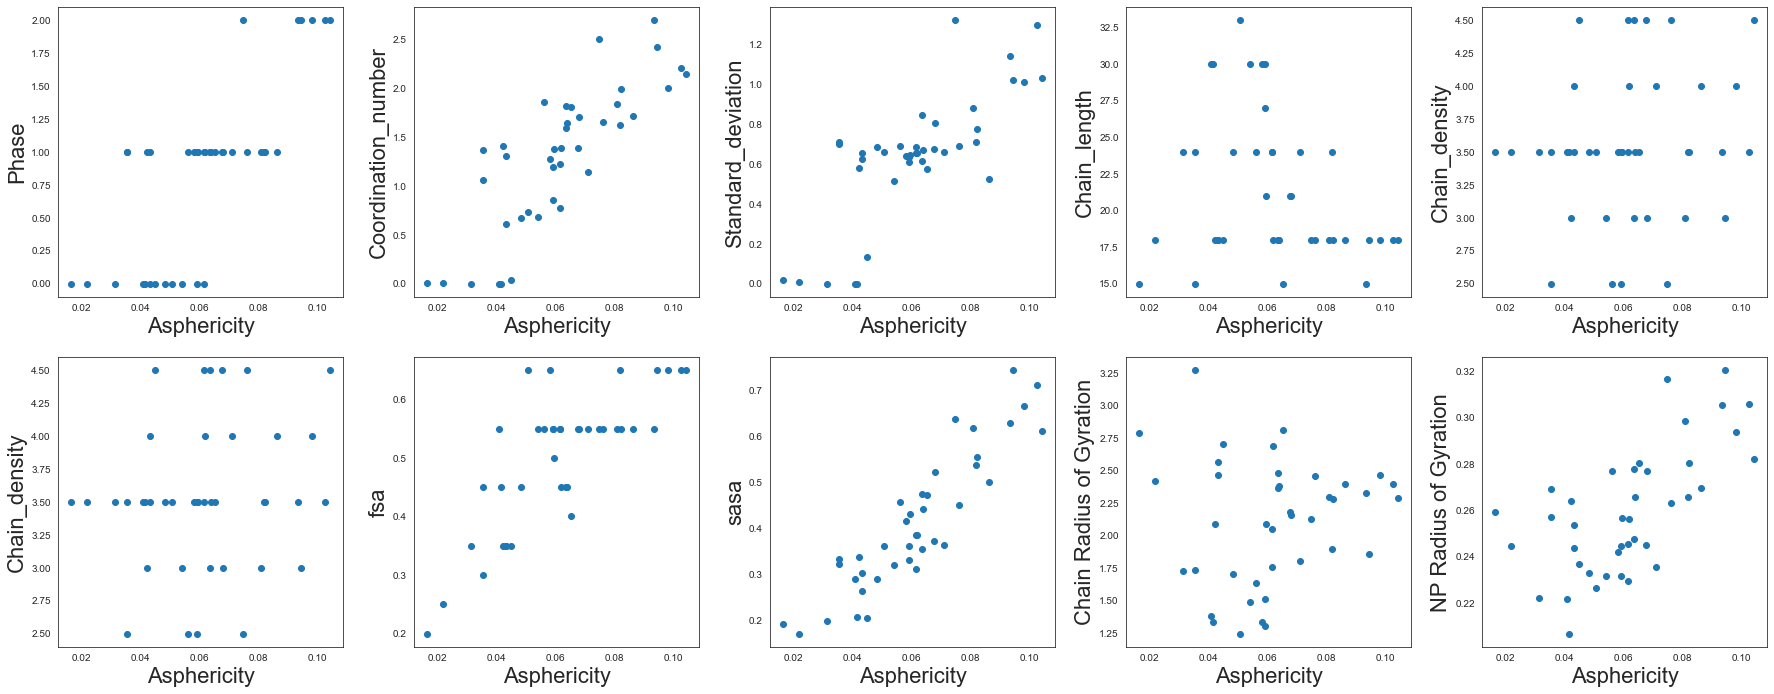

In [15]:
parameter = 'Asphericity'
length = len(df.axes[1])
figs,axs = plt.subplots(2,5,figsize=(25,10))
for j in [0,1]:
    for i in [0,1,2,3,4]:
        yattribute = df.drop(parameter, axis=1).axes[1][i+j*4]
        axs[j][i].scatter(df[(df[parameter]>0)][parameter].values,
                        df[(df[parameter]>0)][yattribute].values)
        axs[j][i].set_ylabel(yattribute,fontsize=22)
        axs[j][i].set_xlabel(parameter,fontsize=22)
plt.tight_layout(pad=2)
plt.savefig('Figures/correlatations-Asphericity.pdf',dpi=200)
plt.show()

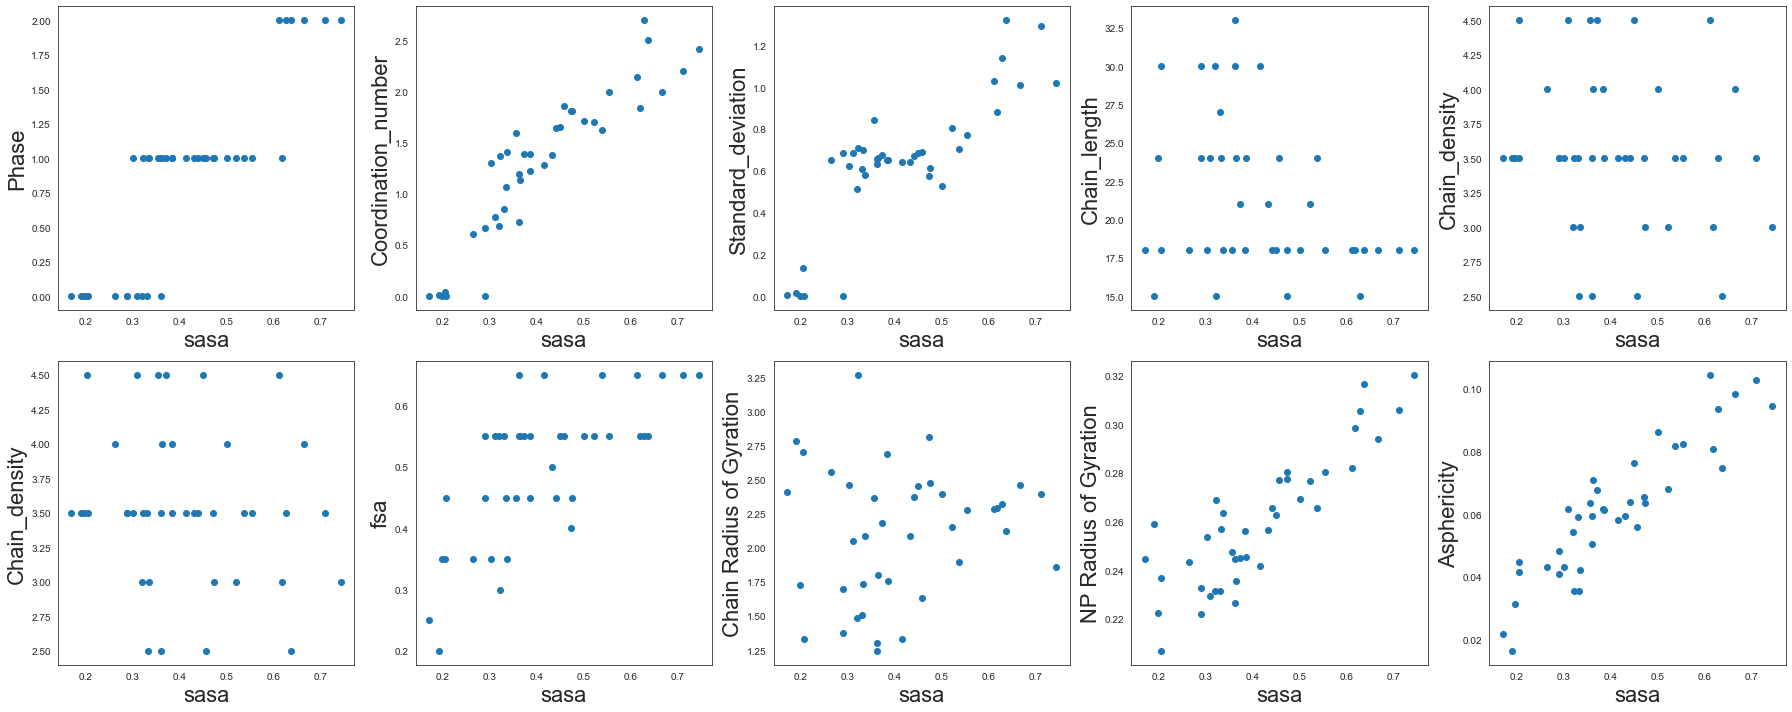

In [16]:
parameter = 'sasa'
length = len(df.axes[1])
figs,axs = plt.subplots(2,5,figsize=(25,10))
for j in [0,1]:
    for i in [0,1,2,3,4]:
        yattribute = df.drop(parameter, axis=1).axes[1][i+j*4]
        axs[j][i].scatter(df[(df[parameter]>0)][parameter].values,
                        df[(df[parameter]>0)][yattribute].values)
        axs[j][i].set_ylabel(yattribute,fontsize=22)
        axs[j][i].set_xlabel(parameter,fontsize=22)
plt.tight_layout()
plt.savefig('Figures/correlatations-SASA.pdf',dpi=200)
plt.show()

# Section 5 : Phase Histograms
Plot different variabes vs the fraction of our simulations that we determined as a particular phase

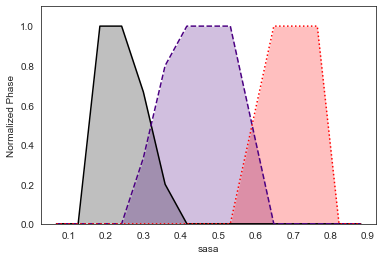

In [17]:
import seaborn as sns
sns.set_style("white")
bins = create_bins(lower_bound=1/26.17,
                   width=1.52/26.17,
                   quantity=15) 
total_counts=Total_Counts(df,bins,'sasa')
bin_center = []
for bin in bins:
    center = (bin[0]+bin[1])/2
    bin_center.append(center)
counts0 = Plot_Phase(df,0,total_counts,bins,'sasa',in_place=False)
counts1 = Plot_Phase(df,1,total_counts,bins,'sasa',in_place=False)
counts2 = Plot_Phase(df,2,total_counts,bins,'sasa',in_place=False)
Plot_All_Phases('sasa',df,bins)

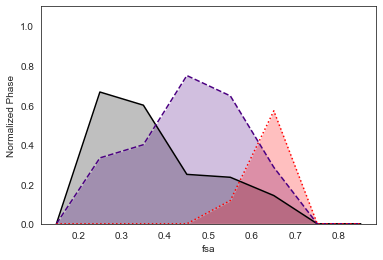

In [18]:
# Get a plot of FSA vs Phase to compare to SASA
bins = create_bins(lower_bound=0.1,
                   width=0.1,
                   quantity=8) 
Plot_All_Phases('fsa',df,bins)

In [19]:
print(25/160,25/120)

0.15625 0.20833333333333334


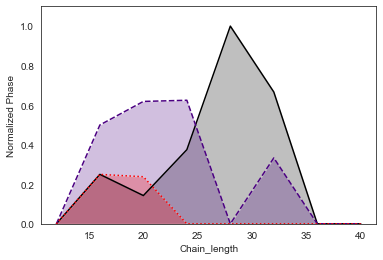

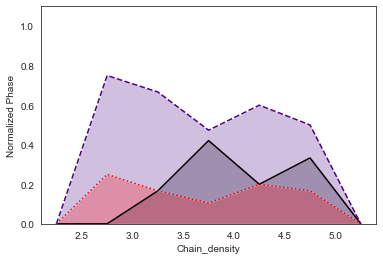

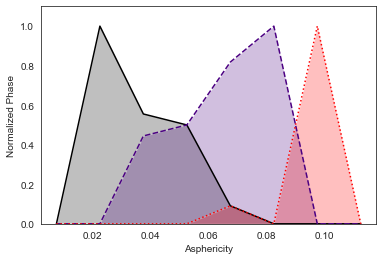

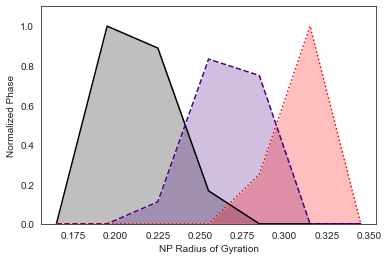

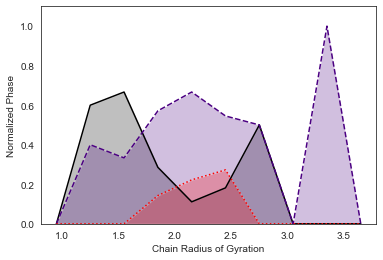

In [9]:
attributes = ['Chain_length', 'Chain_density', 'Asphericity',
              'NP Radius of Gyration','Chain Radius of Gyration']
bins=[]
for size in [[10,4,8],[2,.5,7],[0,0.015,8],[0.15,.03,7],[0.8,.3,9]]:
    bins.append(create_bins(lower_bound=size[0],width=size[1],quantity=size[2]))
    
for i,attribute in enumerate(attributes):
    Plot_All_Phases(attribute,df,bins[i])

# Section 6: Correlation Matrix

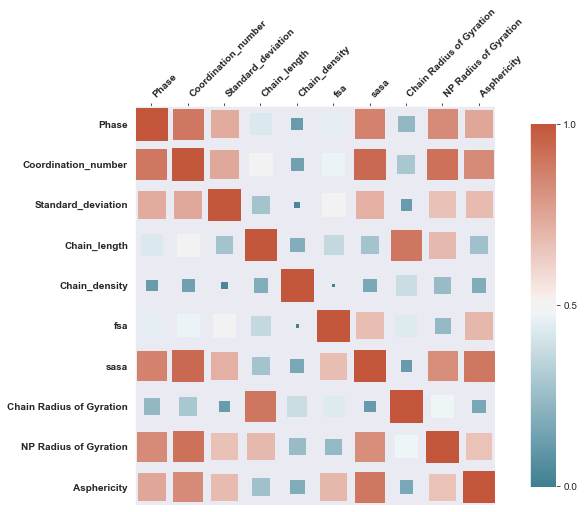

In [21]:
from scipy.stats import spearmanr
import seaborn as sns
def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, size, color):
    #fig, ax = plt.subplots(1,1,figsize=(10,10))
    fig1 = plt.figure(figsize=(8,7),constrained_layout=True)
    gs = fig1.add_gridspec(1, 15)
    ax = fig1.add_subplot(gs[0, :-1])
    ax1 = fig1.add_subplot(gs[0, -1:])
    #fig1, f1_axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True)
    #plot_grid = plt.GridSpec(1, 10, hspace=1, wspace=1,figsize=(10,12)) # Setup a 1x15 grid
    #f, ax = plt.subplots(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot

    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in x.unique()]
    y_labels = [v for v in y.unique()[::-1]]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 1000
    ax.scatter(
        x=x.map(x_to_num),
        y=y.map(y_to_num),
        s=size * size_scale,
        c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s'
        )
    
    ax.xaxis.tick_top()
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='left',weight='bold')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels,weight='bold')
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    
    

    

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax1.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax1.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax1.grid(False) # Hide grid
    ax1.set_facecolor('white') # Make background white
    ax1.set_xticks([]) # Remove horizontal ticks
    ax1.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax1.yaxis.tick_right() # Show vertical ticks on the right 
              
sns.set_style('darkgrid')
n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(220, 20, n=n_colors) # Create the palette
color_min, color_max = [0, 1] # Range of values that will be mapped to the palette
    
'''columns = df.columns[2:] This stuff works for linear correlation value
#corr = df.loc[:, df.columns != 'Unnamed: 0'][columns].corr()
#corr = pandas.melt(corr.reset_index(), id_vars='index') 
#corr.columns = ['x', 'y', 'value']'''

sprman = []
x = []
y= []
for var1 in df.columns[:]:
    for var2 in df.columns[:]:
        corr, _ = spearmanr(df[var1], df[var2])
        sprman.append(corr)
        x.append(var1)
        y.append(var2)
corr = pandas.DataFrame({'x':x,'y':y,'value':sprman})

heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value'].abs()
)


In [22]:
corr.to_csv('Figures/Correlation_matrix.csv')